In [99]:
import pandas as pd
from sklearn.decomposition import PCA
import numpy as np
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
import seaborn as sns

zero = pd.read_csv("clusters/cluster0.csv")
one = pd.read_csv("clusters/cluster1.csv")
two = pd.read_csv("clusters/cluster2.csv")
three = pd.read_csv("clusters/cluster3.csv")
useful = pd.read_csv("useful.csv")
zero.set_index('ID',inplace = True)
two.set_index('ID',inplace = True)
three.set_index('ID',inplace = True)
one.set_index('ID',inplace = True)

Since, each time running Data cleaning, Clustering notebook the labels are switched. We can reset the cluster index by using useful.csv

In [43]:
zero = useful[useful['label']==0]
one = useful[useful['label']==1]
two = useful[useful['label']==2]
three = useful[useful['label']==3]

box plot, violin plot, make a list of each charactoristics , correlation between total points and other components within each cluster

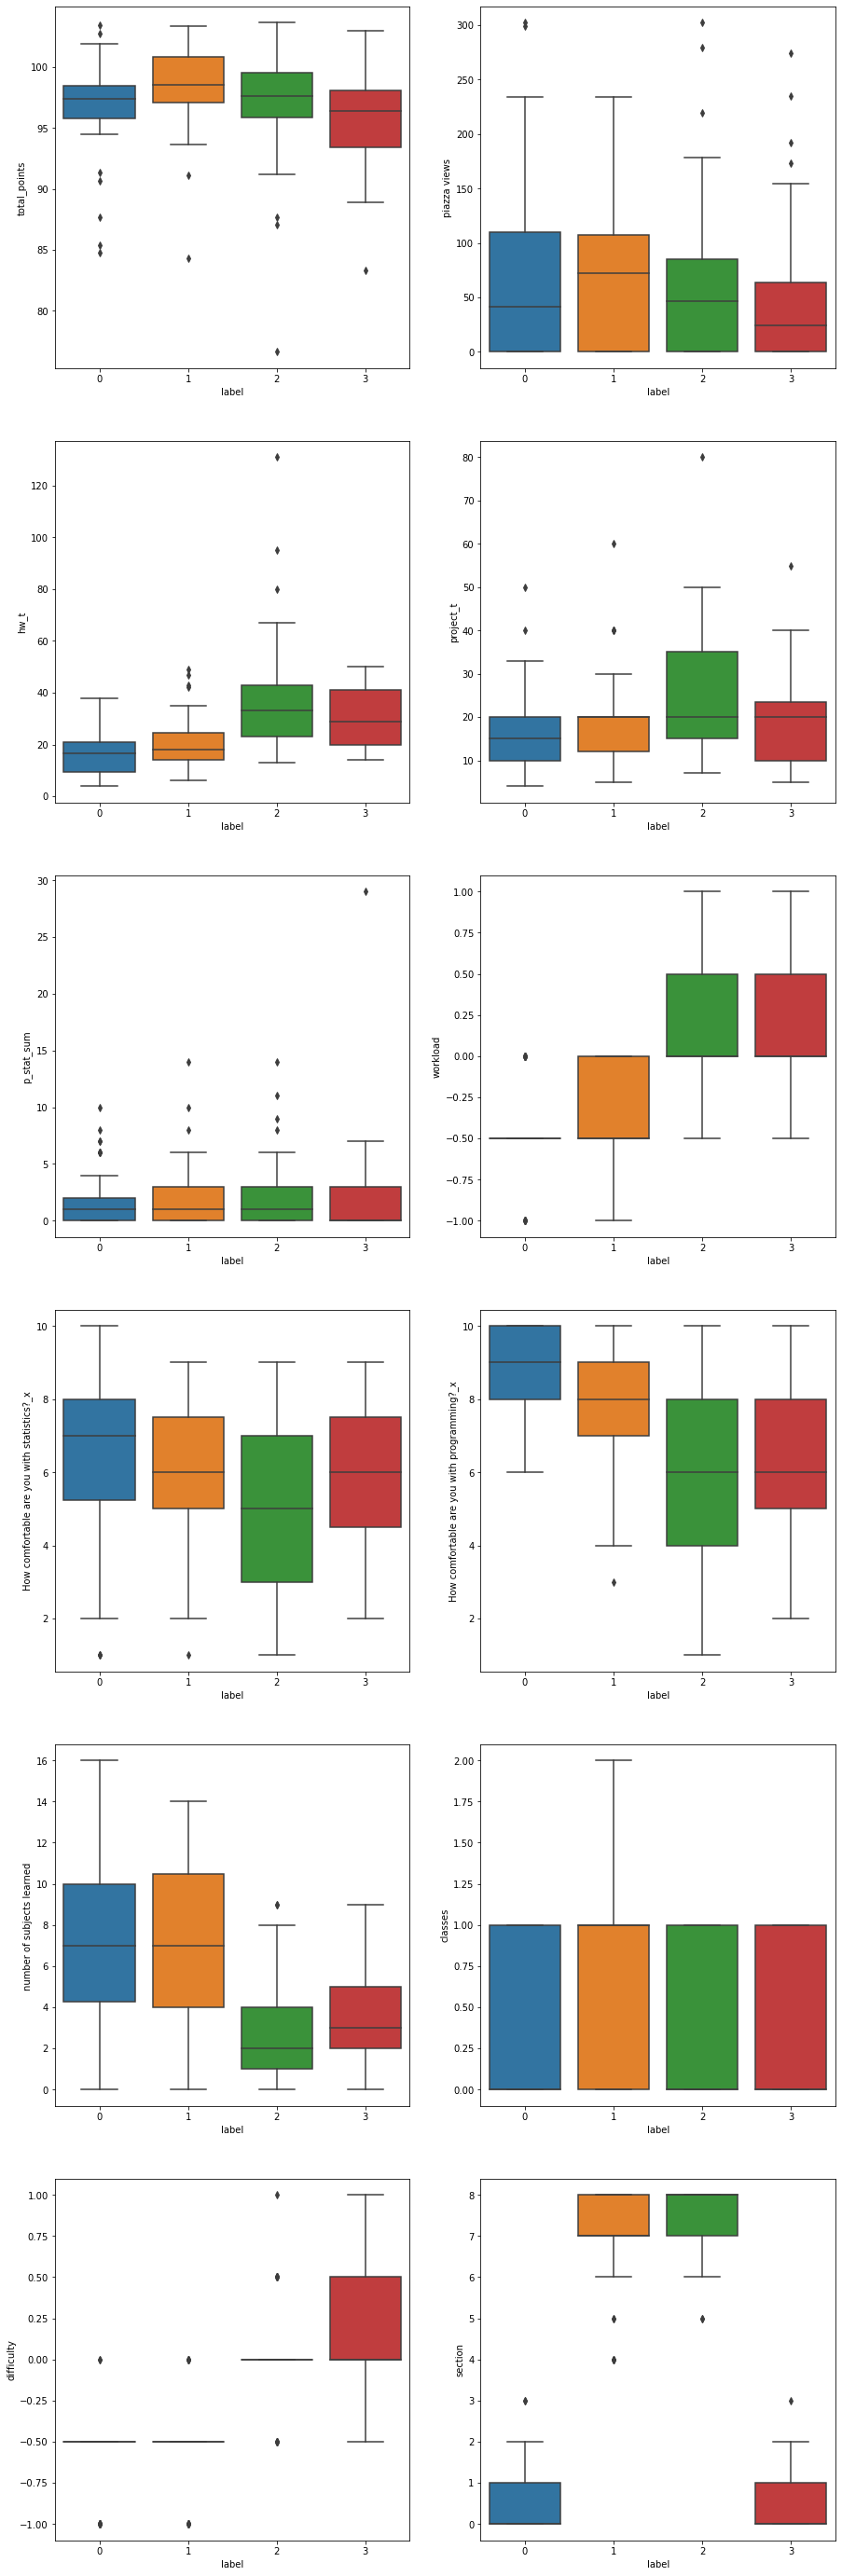

In [56]:
fig, axs = plt.subplots(6,2,figsize= (15,50))
sns.boxplot(x="label", y='total_points', data= useful,ax=axs[0,0])
sns.boxplot(x="label", y='piazza views', data= useful, ax =axs[0,1])
ax = sns.boxplot(x="label", y='hw_t', data= useful,ax =axs[1,0])
ax = sns.boxplot(x="label", y='project_t', data= useful, ax = axs[1,1])
ax = sns.boxplot(x="label", y='p_stat_sum', data= useful, ax = axs[2,0])
ax = sns.boxplot(x="label", y='difficulty', data= useful, ax=axs[5,0])
ax = sns.boxplot(x="label", y='workload', data= useful,  ax=axs[2,1])
ax = sns.boxplot(x="label", y='How comfortable are you with programming?_x', data= useful, ax= axs[3,1])
ax = sns.boxplot(x="label", y='How comfortable are you with statistics?_x', data= useful, ax = axs[3,0])
ax = sns.boxplot(x="label", y='number of subjects learned ', data= useful, ax = axs[4,0])
ax = sns.boxplot(x="label", y='classes', data= useful, ax = axs[4,1])
ax = sns.boxplot(x="label", y='section', data= useful, ax= axs[5,1])

In [45]:
labels = ['CS','DS','COGS','Other']
size0 = [25,19,3,7]
size1 = [9,23,10,1]
size2 = [12,2,28,7]
size3 = [11,1,19,4]

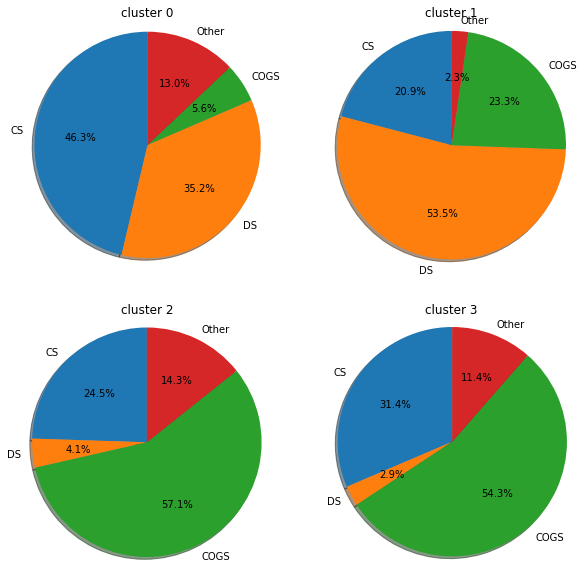

In [54]:
fig1, ax= plt.subplots(2,2, figsize=(10,10))
ax[0,0].pie(size0, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax[0,0].title.set_text('cluster 0')
ax[0,0].axis('equal')
ax[0,1].pie(size1, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax[0,1].title.set_text('cluster 1')
ax[0,1].axis('equal') 
ax[1,0].pie(size2, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax[1,0].title.set_text('cluster 2')
ax[1,0].axis('equal') 
ax[1,1].pie(size3, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax[1,1].axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle.
ax[1,1].title.set_text('cluster 3')
plt.show()

In [47]:
print('CLUSTER ONE VS CLUSTER ZERO'),one['hw_t'].describe(),zero['hw_t'].describe()

CLUSTER ONE VS CLUSTER ZERO


(None,
 count    43.000000
 mean     20.238372
 std      10.728932
 min       6.000000
 25%      14.000000
 50%      18.000000
 75%      24.500000
 max      49.000000
 Name: hw_t, dtype: float64,
 count    54.000000
 mean     16.314815
 std       8.170458
 min       3.850000
 25%       9.250000
 50%      16.500000
 75%      21.000000
 max      38.000000
 Name: hw_t, dtype: float64)

In [48]:
print('CLUSTER TWO VS CLUSTER THREE'),two['hw_t'].describe(),three['hw_t'].describe()

CLUSTER TWO VS CLUSTER THREE


(None,
 count     49.000000
 mean      37.336735
 std       21.553081
 min       13.000000
 25%       23.000000
 50%       33.000000
 75%       43.000000
 max      131.000000
 Name: hw_t, dtype: float64,
 count    35.000000
 mean     31.414286
 std      11.562799
 min      14.000000
 25%      20.000000
 50%      29.000000
 75%      41.000000
 max      50.000000
 Name: hw_t, dtype: float64)

In [50]:
two.sort_values(['hw_t'],ascending=False)

,ID,piazza views,hw_t,section,p_stat_sum,difficulty,workload,project_t,number of subjects learned,How comfortable are you with programming?_x,How comfortable are you with statistics?_x,classes,lanuage,total_points,Major,Level,label
86,214_wi20,0.0,131.0,8.0,0.0,1.0,0.5,40.0,1.0,1.0,1.0,1,1,76.63,CG25,JR,2
94,230_wi20,68.0,95.0,8.0,2.0,0.0,0.0,50.0,7.0,4.0,5.0,1,1,96.73,CG25,SR,2
13,032_wi20,0.0,80.0,7.0,0.0,0.0,0.0,22.0,4.0,4.0,4.0,0,0,98.01,CG30,SR,2
165,397_wi20,219.0,67.0,8.0,5.0,0.0,-0.5,50.0,1.0,6.0,3.0,0,0,97.50,CS26,JR,2
180,444_wi20,0.0,61.0,6.0,0.0,0.0,0.0,80.0,3.0,7.0,3.0,0,1,96.70,EC26,SR,2
26,057_wi20,65.0,57.0,8.0,3.0,0.5,0.5,20.0,1.0,10.0,2.0,0,0,97.90,CS28,SR,2
4,014_wi20,0.0,54.0,8.0,0.0,0.0,0.0,40.0,2.0,4.0,7.0,0,0,98.70,CS26,JR,2
176,430_wi20,0.0,52.0,7.0,0.0,-0.5,0.5,40.0,4.0,10.0,8.0,0,0,96.89,CG25,SR,2
14,033_wi20,101.0,52.0,7.0,14.0,0.5,0.5,30.0,5.0,5.0,4.0,1,1,96.72,CG33,JR,2
74,183_wi20,47.0,50.0,8.0,11.0,0.0,0.0,22.0,3.0,6.0,4.0,1,2,87.66,CG29,JR,2


In [63]:
x = [np.array(one['total_points']).mean(),np.array(zero['total_points']).mean(),np.array(two['total_points']).mean(),np.array(three['total_points']).mean()]
x

[98.36488372093025, 96.81185185185184, 97.11244897959185, 95.79542857142859]

Text(0.5, 1.0, 'heatmap')

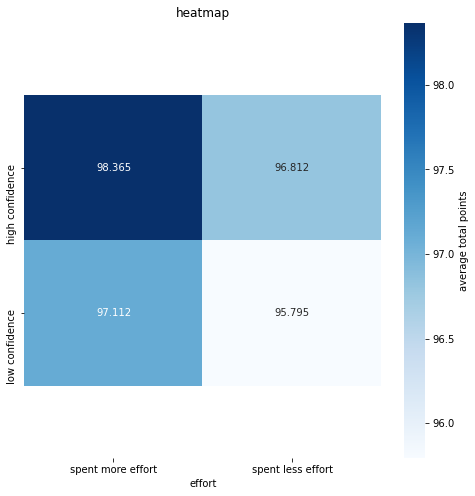

In [67]:

plt.figure(figsize = (8,8))
ax = sns.heatmap(np.array(x).reshape(2,2), cmap="Blues",annot=True, fmt='.3f',
                 yticklabels=['high confidence','low confidence'], xticklabels= ['spent more effort','spent less effort'])
ax.collections[0].colorbar.set_label('average total points')
ax.set(xlabel='effort')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.title('heatmap')

Are the difference in total points statistically significant?


In [77]:
import scipy.stats
t_stat, p = scipy.stats.ttest_ind(np.array(zero['total_points']),np.array(three['total_points']))
p

0.20387435107435486

In [78]:
t_stat, p = scipy.stats.ttest_ind(np.array(three['total_points']),np.array(two['total_points']))
p

0.16593498455331548

In [79]:
t_stat, p = scipy.stats.ttest_ind(np.array(two['total_points']),np.array(one['total_points']))
p

0.14981669308280457

In [80]:
t_stat, p = scipy.stats.ttest_ind(np.array(zero['total_points']),np.array(one['total_points']))
p

0.0358859493663894

How big are the differences in time spent on work?

In [91]:
t1 = zero['hw_t'].mean() +zero['project_t'].mean() 

In [92]:
t2 = one['hw_t'].mean() +one['project_t'].mean() 

In [93]:
t3 = two['hw_t'].mean() +two['project_t'].mean() 

In [94]:
t4 = three['hw_t'].mean() +three['project_t'].mean()
x = np.array([t2,t1,t3,t4])

Text(0.5, 1.0, 'heatmap')

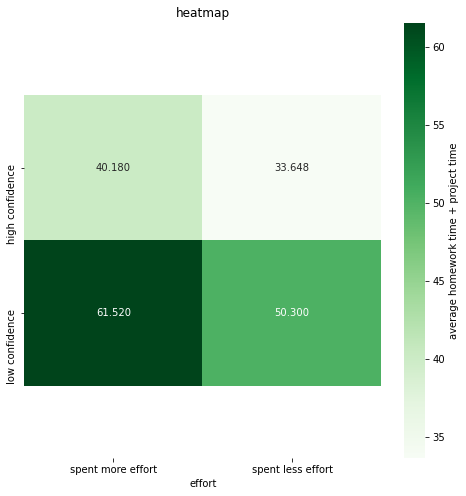

In [98]:

plt.figure(figsize = (8,8))
ax = sns.heatmap(np.array(x).reshape(2,2), cmap="Greens",annot=True, fmt='.3f',
                 yticklabels=['high confidence','low confidence'], xticklabels= ['spent more effort','spent less effort'])
ax.collections[0].colorbar.set_label('average homework time + project time')
ax.set(xlabel='effort')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.title('heatmap')

In [97]:
useful.shape

(181, 17)